In [1]:
# project: final project
# submitter: qguo67
# partner: none
# hours: 15

In [2]:
import pandas as pd
import requests
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv('https://query.data.world/s/tvlbtu4hlweclxx5cxdzvjposlsmmu')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


Text(0.5, 1.0, 'Figure 1: Age Effect on Heart Disease')

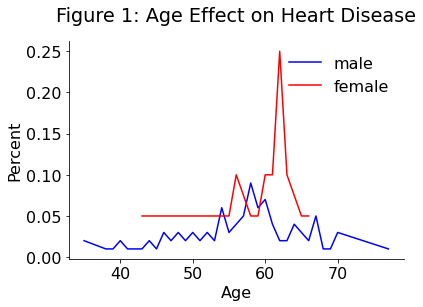

In [5]:
#Figure 1: descriptive stats
presence=df[df["Heart Disease"]=="Presence"]
male=presence[presence["Sex"]==1].Age.value_counts().sort_index()/len(presence[presence["Sex"]==1])
female=presence[presence["Sex"]==0].Age.value_counts().sort_index()/len(presence[presence["Sex"]==0])
ax=male.plot.line(label="male",color="blue")
female.plot.line(ax=ax,label="female",color="red")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False)
ax.set_xlabel("Age")
ax.set_ylabel("Percent")
ax.set_title("Figure 1: Age Effect on Heart Disease", pad=20)

In [6]:
pca = PCA(1)
df["pc1"] = pca.fit_transform(df[["BP","Cholesterol","Max HR"]])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,pc1
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,72.525717
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,312.388783
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,10.913391
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,13.572583
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,18.843485


In [7]:
df1 = df[df["Sex"]==1]
df0 = df[df["Sex"]==0]

Text(0.5, 1.0, 'Figure 2: Heart Condition and Sex')

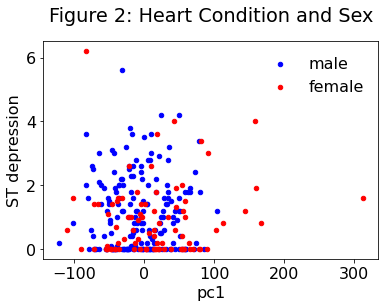

In [8]:
#Figure 2: unsupervised ML
ax=df1.plot.scatter(x="pc1",y="ST depression",color="blue",label="male")
df0.plot.scatter(ax=ax,x="pc1",y="ST depression",color="red",label="female")
ax.legend(frameon=False)
ax.set_title("Figure 2: Heart Condition and Sex", pad=20)

In [9]:
pca.explained_variance_ratio_

array([0.7605338])

In [10]:
train, test = train_test_split(df, stratify=df["Heart Disease"], random_state=0)
train.shape, test.shape

((202, 15), (68, 15))

In [11]:
xcols = ["Age","BP", "Cholesterol", "Max HR", "ST depression"]
ycol = "Heart Disease"

In [12]:
lr = LogisticRegression()
lr.fit(train[xcols],train[ycol])
print("Score", lr.score(test[xcols], test[ycol]))
lr.coef_

Score 0.6764705882352942


array([[-0.00640312,  0.01273655,  0.00527727, -0.02898998,  0.85894953]])

In [13]:
pipe = Pipeline([ 
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])
pipe.fit(train[xcols],train[ycol])
print("Score",pipe.score(test[xcols], test[ycol]))
pipe['lr'].coef_

Score 0.6764705882352942


array([[-0.04446253,  0.21537547,  0.26821921, -0.62369246,  0.97710903]])

In [14]:
test = test.copy()
test["predicted_result"] = pipe.predict(test[xcols])
test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,pc1,predicted_result
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7,Presence,-20.840177,Absence
146,52,1,4,112,230,0,0,160,0,0.0,1,1,3,Presence,-21.031923,Absence
133,64,1,4,120,246,0,2,96,1,2.2,3,1,3,Presence,-3.829155,Presence
245,60,1,4,130,253,0,0,144,1,1.4,1,1,7,Presence,3.304292,Presence
55,41,0,2,105,198,0,0,168,0,0.0,1,1,3,Absence,-53.517046,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,54,1,3,120,258,0,2,147,0,0.4,2,0,7,Absence,7.584768,Absence
158,56,1,1,120,193,0,2,162,0,1.9,2,0,7,Absence,-57.427201,Absence
118,66,0,1,150,226,0,0,114,0,2.6,3,0,3,Absence,-21.954286,Presence
136,67,0,3,152,277,0,0,172,0,0.0,1,1,3,Absence,28.426762,Absence


In [15]:
accuracy_score(test["Heart Disease"],test["predicted_result"])

0.6764705882352942

In [16]:
pipe['lr'].coef_[0]

array([-0.04446253,  0.21537547,  0.26821921, -0.62369246,  0.97710903])

Text(0.5, 1.0, 'Figure 3: Logistic Regression Coefficients')

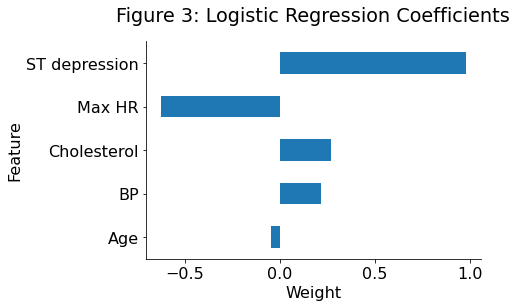

In [17]:
#Figure 3:supervised ML
idx = [t for t in xcols]
ax = pd.Series(pipe['lr'].coef_[0],index=idx).plot.barh()
ax.set_xlabel("Weight")
ax.set_ylabel("Feature")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 3: Logistic Regression Coefficients", pad=20)